In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Q1 Load the following image and detect as much as you can all faces

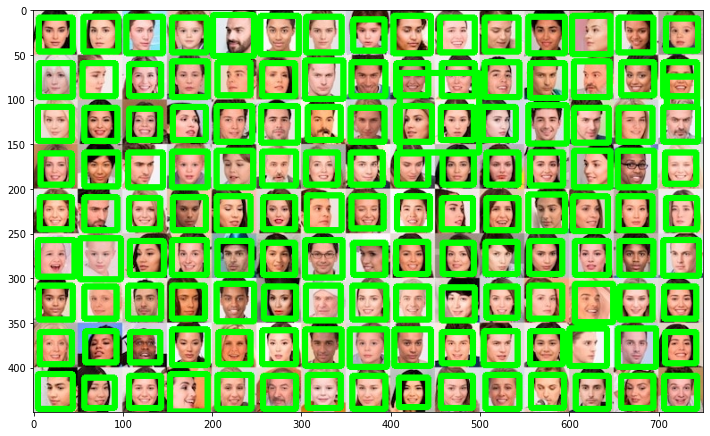

In [45]:
faceClassifier=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

img = cv2.imread('C:\\Users\\Lenovo\\Desktop\\faces.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(12,12))
faces=faceClassifier.detectMultiScale(gray,scaleFactor=1.01,minNeighbors=11,minSize=(30,30))

for x,y,w,h in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),5)
    

plt.imshow(img[:,:,::-1])

Q2 Load the following image and detect faces,eye,smile and write under every
detection label “Peter” ,”eye” ,”smile” as arranged.


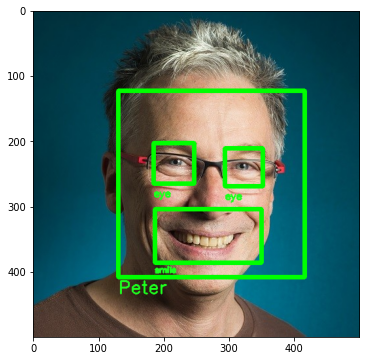

In [2]:

faceClassifier=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
eyeClassifier=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
smileClassifier=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_smile.xml')

img = cv2.imread('C:\\Users\\Lenovo\\Desktop\\smile.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(6,6))
faces=faceClassifier.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=4,minSize=(70,70))

for x,y,w,h in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),5)
    cv2.putText(img, 'Peter', (x, y+h+25), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (30,255,30), 2)
    face=gray[y:y+h,x:x+w]
    eyes=eyeClassifier.detectMultiScale(face,scaleFactor=1.004,minNeighbors=15,minSize=(50,50))
    smiles=smileClassifier.detectMultiScale(face,scaleFactor=1.1,minNeighbors=6,minSize=(70,70))
    for x2,y2,w2,h2 in eyes:
        cv2.rectangle(img,(x+x2,y+y2),(x+x2+w2,y+y2+h2),(0,255,0),5)
        cv2.putText(img, 'eye', (x+x2, y+y2+h2+20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (30,255,30), 2)
    for x3,y3,w3,h3 in smiles:
        cv2.rectangle(img,(x+x3,y+y3),(x+x3+w3,y+y3+h3),(0,255,0),5)
        cv2.putText(img, 'smile', (x+x3, y+y3+h3+15), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (30,255,30), 2)
    

plt.imshow(img[:,:,::-1])

Q3 Run your camera stream and make detection for faces,eye,smile and write
under every detection label “me” ,”eye” ,”smile” as arranged. Make circle for eye
and others rectangle

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
cap=cv2.VideoCapture(0)
cv2.namedWindow('my_image')
faceClassifier=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
eyeClassifier=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
smileClassifier=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_smile.xml')

while (cap.isOpened()):
   
    ret,frame=cap.read()

    if (ret):
        gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        faces=faceClassifier.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=6,minSize=(70,70))
        for x,y,w,h in faces:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),5)
            cv2.putText(frame, 'me', (x, y+h+25), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (30,255,30), 2)
            face=gray[y:y+h,x:x+w]
            eyes=eyeClassifier.detectMultiScale(face,scaleFactor=1.1,minNeighbors=6,minSize=(50,50))
            smiles=smileClassifier.detectMultiScale(face,scaleFactor=1.1,minNeighbors=6,minSize=(70,70))
            for x2,y2,w2,h2 in eyes:
                cv2.circle(frame,(x+x2+30,y+y2+30),30,(0,255,0),2)
                cv2.putText(frame, 'eye', (x+x2, y+y2+h2+20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (30,255,30), 2)
            for x3,y3,w3,h3 in smiles:
                cv2.rectangle(frame,(x+x3,y+y3),(x+x3+w3,y+y3+h3),(0,255,0),5)
                cv2.putText(frame, 'smile', (x+x3, y+y3+h3+15), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (30,255,30), 2)
        

    cv2.imshow("my_image",frame)
    k=cv2.waitKey(1)
    if k==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
